# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [49]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [50]:
# checking dataframe
print(df.head())
df.info()
df.temperature.describe()
df.gender.describe()
df.heart_rate.describe()

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


count    130.000000
mean      73.761538
std        7.062077
min       57.000000
25%       69.000000
50%       74.000000
75%       79.000000
max       89.000000
Name: heart_rate, dtype: float64

In [51]:
#downloading packages
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

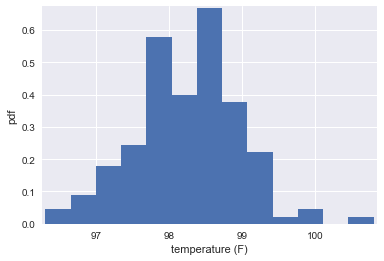

In [52]:
#plot pdf
sns.set()
_ = plt.hist(df.temperature, bins = 13, normed = True)
_ = plt.xlabel('temperature (F)')
_ = plt.ylabel('pdf')
_ = plt.margins(0.01)
plt.show()

In [53]:
#making ECDF function to use
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

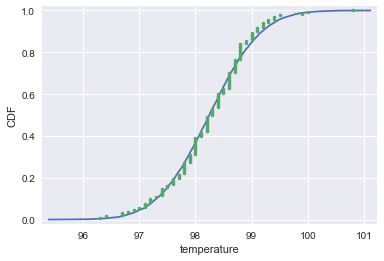

In [54]:
#creating replica and show whether our actual data is normal distribution or not 
np.random.seed(42)
mean = np.mean(df.temperature)
std = np.std(df.temperature)
samples = np.random.normal(mean, std, size = 10000)
x_theor, y_theor = ecdf(samples)
x, y = ecdf(df.temperature)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('temperature')
_ = plt.ylabel('CDF')
plt.show()
#the graph illustrates that body temperature could be normal distribution 

In [55]:
#data is big enough since we have 130 observations which is enough to use z-stat.
#also, our sample should be independent because the temperature in human body has no relationship between each other. 

In [56]:
#try to use bootstrap replicates method to test hypothesis 
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates

bs_replicates = draw_bs_reps(df.temperature, np.mean, 10000)
p = np.sum(bs_replicates <= mean) / 10000
print('p = ', p)
# cannot reject H0, the mean test suggests that body temperature is normal distributed
bs_replicates = draw_bs_reps(df.temperature, np.std, 10000)
p = np.sum(bs_replicates <= std) / 10000
print('p = ', p)
# cannot reject H0, the std test also suggests that body temperature is normal distributed

p =  0.4969
p =  0.5441


In [57]:
#using z stat bacause our sample is more than 30 observation
z = (98.6 - mean)/(std)
print(z)
import scipy.stats as stats
prob = 1 - stats.norm.cdf(z)
print(prob)
# reject h0 

0.48027041116080765
0.31551756279274257


In [58]:
# draw 10 samples fromthe data
small = np.random.choice(df.temperature, 10)
small
z_small = (98.6 - np.mean(small))/(np.std(small))
print(z_small)
prob = 1 - stats.norm.cdf(z_small)
print(prob)
#we should try t-test since our observation is quite smalll 
from scipy import stats
onesample_results = stats.ttest_1samp(small, 98.6)
print(onesample_results)

0.481543412343067
0.31506516665213347
Ttest_1sampResult(statistic=-1.444630237029201, pvalue=0.18246001075134266)


In [62]:
#using z_stat to get 95 % confidence interval 
interval = 98.6 - (np.array([-1.96,1.96])*std)
print(interval)
print(np.percentile(df.temperature,[2.5,97.5]))
# trying to use bs replicates
def bootstrap_replicate_low(data, size=1):
    low = np.empty(size)
    for i in range(size):
        low[i] = np.percentile(np.random.choice(data, size=len(data)),2.5)
    return low
low = bootstrap_replicate_low(df.temperature,10000)
low_95 = np.percentile(low,[2.5,97.5])
print('95 % interval of lower bound is',low_95)
def bootstrap_replicate_high(data, size=1):
    high = np.empty(size)
    for i in range(size):
        high[i] = np.percentile(np.random.choice(data, size=len(data)),97.5)
    return high
high = bootstrap_replicate_high(df.temperature,10000)
high_95 = np.percentile(high,[2.5,97.5])
print('95 % interval of upper bound is',high_95)

[100.03150125  97.16849875]
[96.7225 99.4775]
[98.12230769 98.37309615]
95 % interval of lower bound is [96.4 97.1]
95 % interval of upper bound is [ 99.2 100. ]


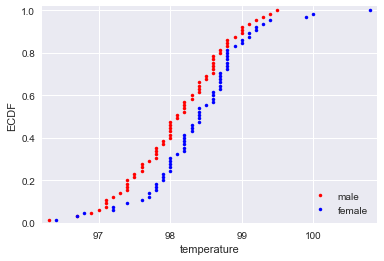

p-value = 0.9881


In [69]:
# test M and F samples
male = df.temperature[df.gender == 'M']
female = df.temperature[df.gender == 'F']
diff = np.mean(male)-np.mean(female)
# graphically
# Create and plot ECDFs from original data
x_1, y_1 = ecdf(male)
x_2, y_2 = ecdf(female)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')
# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('temperature')
_ = plt.ylabel('ECDF')
_ = plt.legend(('male', 'female'), loc='lower right')
plt.show()
#the graph shows that female temperature is higher than male temperature

#I use bs method to investigate whether the mean of temperature between male and female is equaled or not
# testing
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1)-np.mean(data_2)
    return diff
diff = diff_of_means(male,female)
bs_replicates = np.empty(10000)
for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(df.temperature, size=len(df.temperature))
    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(male)],
                                     bs_sample[len(male):])
# Compute and print p-value: p
p = np.sum(bs_replicates >= diff) / 10000
print('p-value =', p)
#our test suggests that there is a high chance that temperature between male and female is not equaled. 